# Assignment: Pandas Fundamentals with Earthquake Data

In this assignment, we will review pandas fundamentals, such as how to

- Open csv files
- Manipulate dataframe indexes
- Parse date columns
- Examine basic dataframe statistics
- Manipulate text columns and extract values
- Plot dataframe contents using
  - Bar charts
  - Histograms
  - Scatter plots

First, import Numpy, Pandas and Matplotlib and set the display options.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Data for this assignment in .csv format downloaded from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/) is available at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

You don't need to download this file. You can open it directly with Pandas.

### 1) Use Pandas' read_csv function directly on this URL to open it as a DataFrame
(Don't use any special options). Display the first few rows and the DataFrame info.

In [2]:
df = pd.read_csv("http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


You should have seen that the dates were not automatically parsed into datetime types.

### 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index

Verify that this worked using the `head` and `info` functions.


In [3]:
df = pd.read_csv("http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv", parse_dates = [0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       120108 non-null  datetime64[ns]
 1   latitude   120108 non-null  float64       
 2   longitude  120108 non-null  float64       
 3   depth      120107 non-null  float64       
 4   mag        120065 non-null  float64       
 5   magType    120065 non-null  object        
 6   nst        59688 non-null   float64       
 7   gap        94935 non-null   float64       
 8   dmin       85682 non-null   float64       
 9   rms        119716 non-null  float64       
 10  net        120108 non-null  object        
 11  id         120108 non-null  object        
 12  updated    120108 non-null  object        
 13  place      120108 non-null  object        
 14  type       120108 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(6)
memory usage: 13.7+ MB


In [4]:
df = df.set_index('id')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


### 3) Use `describe` to get the basic statistics of all the columns

Note the highest and lowest magnitude of earthquakes in the databse.

In [5]:
df.describe()

#highest magnitude: 697.36
#lowest magnitude: -9.9

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,2014-07-05 09:10:37.116720128,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
min,2014-01-01 00:01:16.610000,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,2014-04-08 03:43:10.768999936,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,2014-07-07 10:44:06.035000064,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,2014-09-30 23:36:40.595000064,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,2014-12-31 23:54:33.900000,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000
std,NaN,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046


### 4) Use `nlargest` to get the top 20 earthquakes by magnitude

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nlargest.html

In [6]:
df.nlargest(n = 20, columns = "mag")

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


Examine the structure of the `place` column. The state / country information seems to be in there. How would you get it out?

### 5) Extract the state or country using Pandas [text data functions](https://pandas.pydata.org/pandas-docs/stable/text.html)

Add it as a new column to the dataframe called `country`. Note that some of the "countries" are actually U.S. states.

In [7]:
df[['place', 'country']] = df['place'].str.split(', ', n = 1, expand = True)

In [8]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,26km S of Redoubt Volcano,earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,32km S of Alamo,earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,12km NNW of North Nenana,earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,22km S of Cantwell,earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,10km WNW of Progreso,earthquake,Mexico


### 6) Display each unique value from the new column

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html

In [9]:
df.country.unique()

array(['Alaska', 'Nevada', 'Mexico', 'California', 'Papua New Guinea',
       'New Zealand', 'Missouri', None, 'Montana',
       'British Virgin Islands', 'Washington', 'Oregon', 'Canada', 'Fiji',
       'Antarctica', 'Chile', 'Utah', 'Indonesia', 'Solomon Islands',
       'Micronesia', 'Oklahoma', 'Hawaii', 'Wyoming', 'Russia', 'Arizona',
       'Philippines', 'Bolivia', 'Greece', 'Japan', 'Puerto Rico', 'Iran',
       'Tonga', 'Wallis and Futuna', 'Colorado', 'Guam', 'CA', 'Idaho',
       'Pakistan', 'Burma', 'China', 'Peru', 'Costa Rica', 'East Timor',
       'Japan region', 'Northern Mariana Islands', 'El Salvador', 'Samoa',
       'Taiwan', 'Arkansas', 'South Sandwich Islands', 'Colombia',
       'Dominican Republic', 'Argentina', 'Texas', 'New Hampshire',
       'Saint Helena', 'Tanzania', 'Vanuatu', 'Bosnia and Herzegovina',
       'India', 'American Samoa', 'Tennessee', 'Kentucky', 'Serbia',
       'Nicaragua', 'Republic of the Congo', 'U.S. Virgin Islands', '',
       'Guatema

### 7) Create a filtered dataset that only has earthquakes of magnitude 4 or larger and

In [10]:
big_df = df[df.mag >= 4]
big_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08T01:43:19.000Z,115km ESE of Taron,earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08T01:43:19.000Z,120km N of Raoul Island,earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,None
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08T01:43:19.000Z,72km E of Amatignak Island,earthquake,Alaska
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08T01:43:19.000Z,100km ESE of Taron,earthquake,Papua New Guinea


### 8) Using the filtered dataset (magnitude > 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with the most earthquakes

Location name on the x axis, Earthquake count on the y axis

In [11]:
country_occurrences_df = big_df['country'].value_counts().to_frame().reset_index().rename(columns={'index':'country', 'values':'count'})
country_occurrences_df.head()

,country,count
0,Indonesia,2112
1,Papua New Guinea,1354
2,Japan,1150
3,Chile,1119
4,New Zealand,758


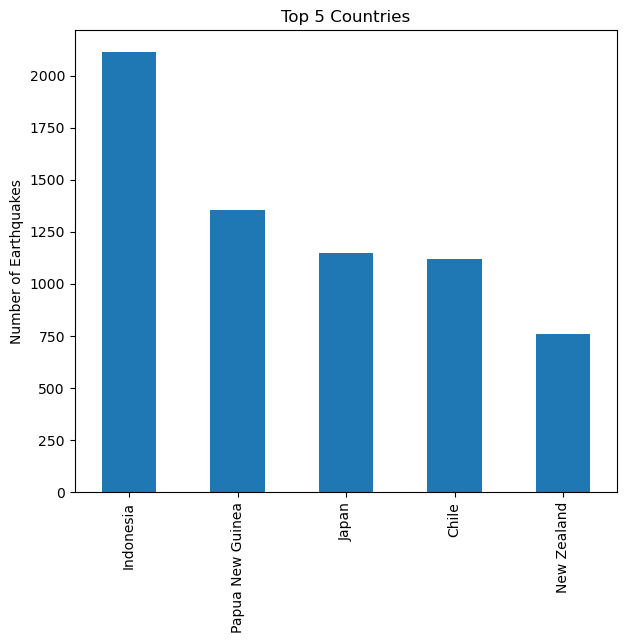

In [12]:
fig, axes = plt.subplots(figsize = (7, 6))
ax0 = axes

country_occurrences_df.iloc[:5].plot(ax = ax0, kind = 'bar', legend = False)
ax0.set_title('Top 5 Countries')
ax0.set_ylabel('Number of Earthquakes')
ax0.set_xticklabels(country_occurrences_df.iloc[:5]['country']);

### 9) Make a histogram the distribution of the Earthquake magnitudes

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

Do one subplot for the filtered and one for the unfiltered dataset.
Use a Logarithmic scale. What sort of relationship do you see?

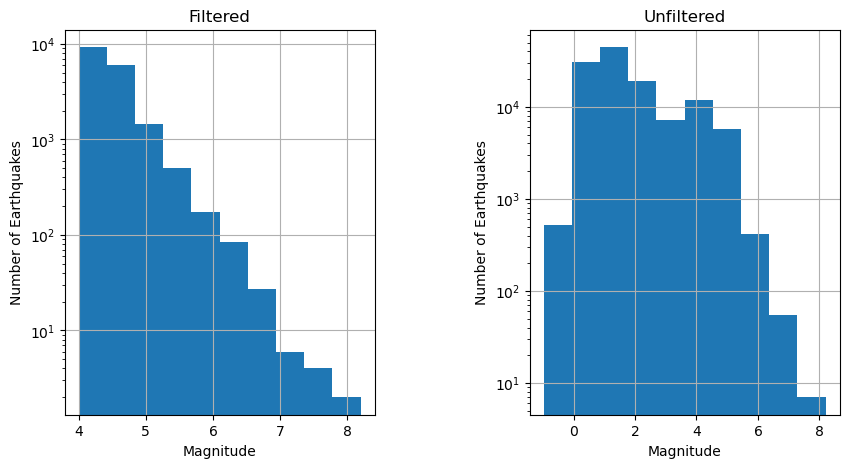

In [13]:
fig, axes = plt.subplots(figsize = (10, 5), ncols = 2)
ax0, ax1 = axes
plt.subplots_adjust(wspace = 0.5)

big_df['mag'].hist(ax = ax0, log = True)
ax0.set_title('Filtered')
ax0.set_xlabel('Magnitude')
ax0.set_ylabel('Number of Earthquakes')

df['mag'].hist(ax = ax1, log = True)
ax1.set_title('Unfiltered')
ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Number of Earthquakes');

# For the filtered data, the number of earthquakes decreases monotonically with increasing magnitude. This isn't the case for the unfiltered data, where the 
# number of earthquakes increases and then (mostly) decreases with increasing magnitude. 

### 11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude

Use a two-column subplot with both the filtered and unfiltered datasets. Color the points by magnitude. Make it pretty

What difference do you note between the filtered and unfiltered datasets?

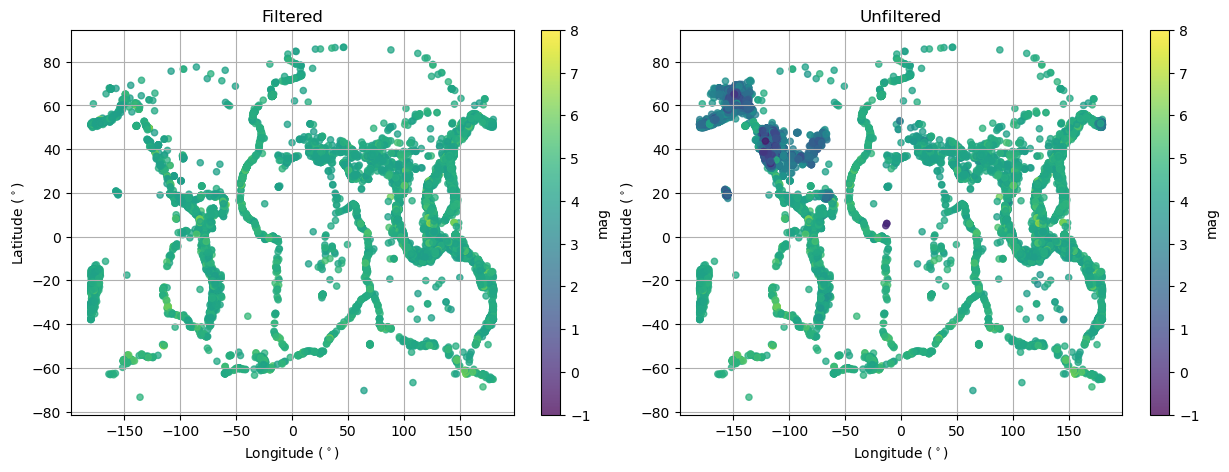

In [57]:
fig, axes = plt.subplots(figsize = (15, 5), ncols = 2)
ax0, ax1 = axes
plt.subplots_adjust(wspace = 0.1)

# plot 1 - filtered
big_df.plot(ax = ax0, kind = 'scatter', x = 'longitude', y = 'latitude', c = 'mag', grid = True, alpha = 0.75, vmin = -1, vmax = 8)
ax0.set_title('Filtered')
ax0.set_xlabel(r'Longitude $(^\circ)$')
ax0.set_ylabel(r'Latitude $(^\circ)$')

# plot 2 - unfiltered
df.plot(ax = ax1, kind = 'scatter', x = 'longitude', y = 'latitude', c = 'mag', grid = True, alpha = 0.75, vmin = -1, vmax = 8)
ax1.set_title('Unfiltered')
ax1.set_xlabel(r'Longitude $(^\circ)$')
ax1.set_ylabel(r'Latitude $(^\circ)$');

# Made 2 options for these plots (with and without Cartopy)!

In [ ]:
projPC = ccrs.PlateCarree()
lonW = -180
lonE = 180
latS = -80
latN = 80
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '110m'

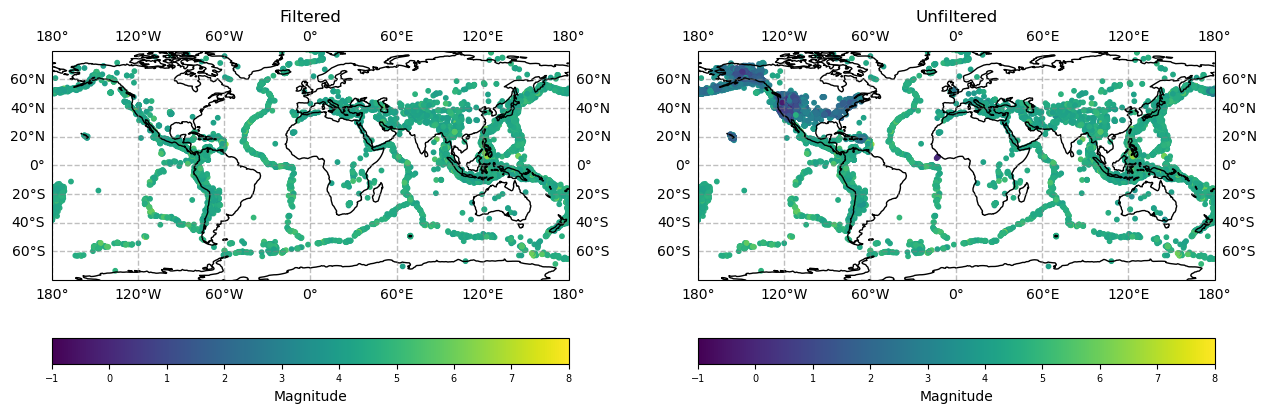

In [116]:
fig, axes = plt.subplots(figsize = (15, 5), ncols = 2, subplot_kw=dict(projection=ccrs.PlateCarree()))
ax0, ax1 = axes
plt.subplots_adjust(wspace = 0.25)

# plot 1 - filtered
splot0 = ax0.scatter(big_df['longitude'], big_df['latitude'], c = big_df['mag'], cmap='viridis', vmin = -1, vmax = 8, s = 10)
ax0.set_title('Filtered')
gl = ax0.gridlines(draw_labels = True, linewidth = 1, color = 'gray', alpha = 0.5, linestyle = '--')
ax0.set_extent([lonW, lonE, latS, latN], crs = projPC)
ax0.coastlines(resolution = res, color = 'black')
cbar0 = plt.colorbar(splot0, orientation="horizontal")
cbar0.set_label(label = 'Magnitude', size = 10)
cbar0.ax.tick_params(labelsize = 7) 

# plot 2 - unfiltered
splot1 = ax1.scatter(df['longitude'], df['latitude'], c = df['mag'], cmap='viridis', vmin = -1, vmax = 8, s = 10)
ax1.set_title('Unfiltered')
ax1.set_xlabel(r'Longitude $(^\circ)$')
ax1.set_ylabel(r'Latitude $(^\circ)$')
gl = ax1.gridlines(draw_labels = True, linewidth = 1, color = 'gray', alpha = 0.5, linestyle = '--')
ax1.set_extent([lonW, lonE, latS, latN], crs = projPC)
ax1.coastlines(resolution = res, color = 'black')
cbar1 = plt.colorbar(splot1, orientation="horizontal")
cbar1.set_label(label = 'Magnitude', size = 10)
cbar1.ax.tick_params(labelsize = 7);

# What difference do you note between the filtered and unfiltered datasets?
# The only difference between the filtered and unfiltered data is the inclusion/exclusion of low magnitude earthqaukes... 
# The unfiltered data plot (right) has many more earthquakes in North America than the filtered data plot (left).